0.0844619566656 {'5%': array([ 0.0516497]), '50%': array([ 0.091207]), '95%': array([ 0.10642494])} 769


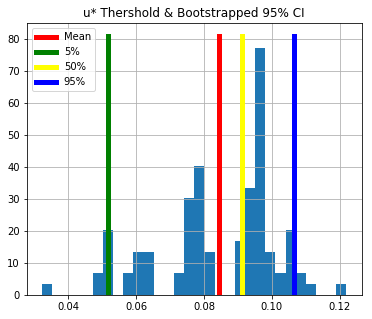

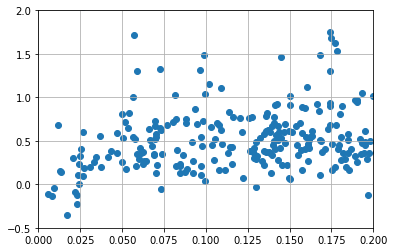

In [15]:
import os
import scipy.stats as stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import pytz
from sklearn.utils import resample
%matplotlib inline
import warnings

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor as MPR
from sklearn.preprocessing import Normalizer,StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from scipy.optimize import curve_fit
from matplotlib.ticker import NullFormatter
import Data_Processor as DP
import importlib
importlib.reload(DP)
# warnings.filterwarnings('ignore')
Root = 'C:/FishIsland_2017/'
FluxFolder='FluxResults/ProperWindSpeeds/'

TenHz_Path = Root+FluxFolder+'10Hz/eddypro_10Hz_full_output_2018-03-25T172145_adv.csv'
OneHz_Path = Root+FluxFolder+'1Hz/eddypro_1Hz_full_output_2018-03-25T142146_adv.csv'

Met_Path = Root+'MetStationData/CR1000_ClimateData_Updated.txt'
Soil_Path = Root+'SoilStationData/Soil_Data.csv'


Comp = DP.Compile([TenHz_Path,OneHz_Path],Met_Path,Soil_Path)

Drop = [['2017-06-01 15:00:00','2017-06-23 15:00:00'],
['2017-08-28 00:00:00','2017-09-11 16:00:00'],
['2017-09-12 07:30:00','2017-09-12 15:00:00']]
Var = ['All','co2_flux','co2_flux']
for drop,var in zip(Drop,Var):
    Comp.Date_Drop(drop,Vars=var)
    
    
    
    
Periods = [['2017-07-10 15:30:00','2017-08-23 15:00:00'],
           ['2017-06-23 15:00:00','2017-07-10 15:00:00'],
            ['2017-08-23 15:30:00','2017-09-13 23:00:00']]
# Var = ['All','co2_flux','co2_flux']
for i,per in enumerate(Periods):
    Comp.Date_Key(per,i)
    
Comp.Rain_Check([.5,0])

# Comp.Wind_Bins(30)
# Comp.PPFD_Bins(100)
    
Comp.QC_Check(2)
Comp.Spike_Removal(z_thresh=5.5)
Comp.StorageCorrection()
Comp.Wind_Filter(30)
Comp.ustar_Bins(30,{'Var':'PPFD_Avg','Thresh':10},{'Var':'co2_flux','Plot':True},
                {'Repetitions':100,'n_samples':10000})
plt.figure()
plt.scatter(Comp.uFilterData['u*'],Comp.uFilterData['fco2'])
plt.ylim(-.5,2)
plt.xlim(0,.2)
plt.grid()

print(Comp.uThresh,Comp.Pct,Comp.uThresh_SampSize)

In [16]:
Comp.Ustar_Drop()
Comp.CustomVars()

# print(Comp.Data['Date_Key'])

Comp.Fco2_Fill('PPFD_Avg','AirTC_Avg')

# print(Comp.popts)
# plt.scatter(Comp.Data['Fco2'],Comp.Data['fco2'])

Vars=['H','LE','Fco2','fco2','fch4','wind_speed','air_pressure','AirTC_Avg','NR_Wm2_Avg','PPFD_Avg','Rain_mm_Tot',
      'Table_1','Temp_2_5_1','Temp_15_1','VWC_1','Active_Layer_1','24H Rain','Wtr Tbl Trnd','ET']
Aliases=['H','LE','Fco2','fco2','fch4','Wind Spd','air pressure','Ta','Rn','PPFD','Rain','Water Table','Ts 2.5 cm',
         'Ts 15 cm','VWC','Active Layer','24H Rain','Wtr Tbl Trnd','ET']
Comp.Write(Root,Vars,Aliases)
Data = Comp.Data


6
7


C:\Users\wesle\FishIsland_Processing\Data_Processor.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Data['ER'],Data['GPP'] = self.GPP_ER((Data[PPFD],Data[Temp]),popt[0],popt[1],popt[2],popt[3],popt[4])
C:\Users\wesle\FishIsland_Processing\Data_Processor.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # plt.figure(figsize=(5,5))


8
9


C:\Users\wesle\FishIsland_Processing\Data_Processor.py:192: RuntimeWarning: invalid value encountered in sqrt
  return(-1/2*theta*(alpha*PPFD+beta-((alpha*PPFD+beta)**2-4*alpha*beta*theta*PPFD)**.5)+\


{'6': array([ 0.00699058,  3.08920948,  0.83366405,  0.57197645,  2.01302892]), '7': array([ 0.02127885,  9.78644861,  0.56530341,  0.61048602,  1.86882617]), '8': array([ 0.00779335,  3.2219236 ,  0.8550645 ,  0.5954753 ,  1.22905873]), '9': array([ 0.0026393 ,  0.71613011,  1.00017235,  0.39643053,  1.42939461])}


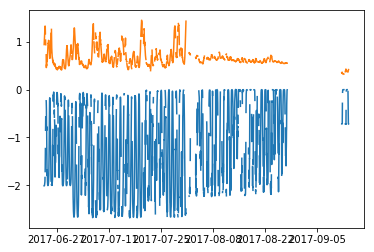

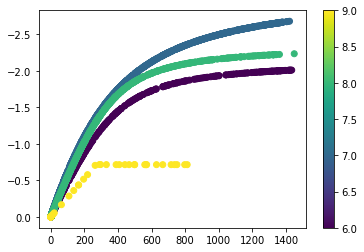

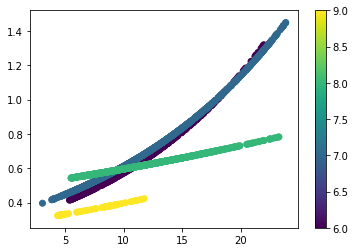

In [17]:
plt.figure()

plt.plot(Comp.Data['GPP'])
plt.plot(Comp.Data['ER'])

plt.figure()
plt.scatter(Data['PPFD'],Data['GPP'],c=Data['Month'])
plt.colorbar()
yl = plt.ylim()
plt.ylim(yl[1],yl[0])
plt.figure()
plt.scatter(Data['AirTC_Avg'],Data['ER'],c=Data['Month'])
plt.colorbar()
print(Comp.popts)

datetime
datetime.1
H
LE
Fco2
fco2
fch4
Wind Spd
air pressure
Ta
Rn
PPFD
Rain
Water Table
Ts 2.5 cm
Ts 15 cm
VWC
Active Layer
24H Rain
Wtr Tbl Trnd
ET
DOY
HR
TempFill
Fch4
Model: Wind Spd
Model: air pressure
Model: Ta
Model: PPFD
Model: Ts 2.5 cm
Model: Wind Spd+PPFD
Model: air pressure+PPFD
Model: Ta+PPFD
Model: PPFD+Ts 2.5 cm
Model: Wind Spd+Ta+PPFD
Model: air pressure+Ta+PPFD
Model: Ta+PPFD+Ts 2.5 cm
Model: Wind Spd+air pressure+Ta+PPFD
Model: air pressure+Ta+PPFD+Ts 2.5 cm
Model: Wind Spd+air pressure+Ta+PPFD+Ts 2.5 cm


KeyError: 'Model: Active Layer'

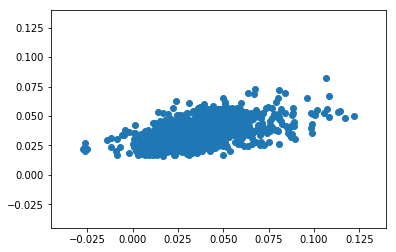

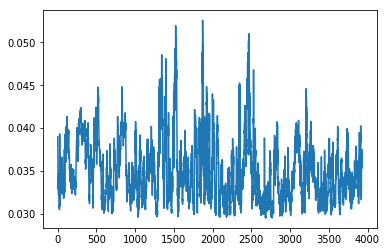

In [25]:
Filled = 'C:\\Users\\wesle\\Downloads/GapFilledfch4.csv'
fill = pd.read_csv(Filled)
for var in fill:
    print(var)
plt.scatter(fill['fch4'],
            fill['Model: Wind Spd+air pressure+Ta+PPFD+Ts 2.5 cm'])
xl = plt.xlim()
plt.ylim(xl[0],xl[1])
plt.figure()
plt.plot(fill['Model: Wind Spd'])
# plt.figure()
# plt.plot(fill['Model: Active Layer'])


In [ ]:
Green = (0,1,.1,.8)
Red = (1,0,.1,.8)

Daily = Data.resample('D').mean()
fig,ax = plt.subplots(2,1,figsize = (10,7.5))

Daily['fco2']=Daily['Fco2']* 1e-6 * 44.0095 *3600*24

Daily['fch4']=Daily['fch4']* 1e-3 * 16.04246 *3600*24

Mn = Daily['fch4'].mean()*28*1e-3+Daily['fco2'].mean()

print(-Mn*81/(365-81))
print(Daily['fch4'].count())
print(Daily['fch4'].mean()*28*1e-3+Daily['fco2'].mean())

ax[0].bar(Daily.index,Daily['fco2'],color = Green,edgecolor = 'black',label='Daily F$_{CO2}$')
ax[0].set_xlim('2017-06-22','2017-09-14')
Daily['Mean']=Daily['fco2'].mean()
ax[0].plot(Daily['Mean'],color='black',label = 'Mean: '+ str(np.round(Daily['Mean'].mean(),2)))
ax[0].grid()
ax[0].set_ylabel('g m$^{-2}$ d$^{-1}$',fontsize = 16)
ax[0].legend(loc=4,fontsize = 16)


ax[1].bar(Daily.index,Daily['fch4'],color = Red,edgecolor = 'black',label = 'Daily F$_{CH4}$')
ax[1].set_xlim('2017-06-22','2017-09-14')
Daily['Mean']=Daily['fch4'].mean()
ax[1].plot(Daily['Mean'],color='black',label = 'Mean: ' + str(np.round(Daily['Mean'].mean(),2)))
ax[1].grid()
ax[1].set_ylabel('mg m$^{-2}$ d$^{-1}$',fontsize = 16)
ax[1].legend(loc = 1,fontsize = 16)

plt.tight_layout()
plt.savefig('C:/Users/wesle/CompsProj/GHG_Balance.png',dpi=500)
plt.show()

In [ ]:
for root,Dir,files in (os.walk(Root+'TagluStationData/Daily/')):
    for i,file in enumerate(files):
        df = pd.read_excel(root+file,sheetname=[0],skiprows=[0,2,3],na_values='NAN')[0]
        df = df.set_index(pd.DatetimeIndex(df.TIMESTAMP))
        for V in ['SoilMoist_Avg(1)','SoilMoist_Avg(2)','SoilMoist_Avg(3)','SoilMoist_Avg(4)','SoilMoist_Avg(5)','SoilMoist_Avg(6)']:
            df[V]=pd.to_numeric(df[V])
        if i <= 5:
            df[['SoilMoist_Avg(1)','SoilMoist_Avg(2)','SoilMoist_Avg(3)','SoilMoist_Avg(4)','SoilMoist_Avg(5)','SoilMoist_Avg(6)']]*=100
        if i == 0:
            Daily = df
        else:
            Daily = Daily.append(df)
            


for root,Dir,files in (os.walk(Root+'TagluStationData/Hourly/')):
    for i,file in enumerate(files):
        df = pd.read_excel(root+file,sheetname=[0],skiprows=[0,1,3],na_values='NAN')[0]
        df = df.set_index(pd.DatetimeIndex(df.TIMESTAMP))
        for V in ['SoilMoist(1)','SoilMoist(2)','SoilMoist(3)','SoilMoist(4)','SoilMoist(5)','SoilMoist(6)']:
            df[V]=pd.to_numeric(df[V])
#         df[['SoilMoist(1)','SoilMoist(2)','SoilMoist(3)','SoilMoist(4)','SoilMoist(5)','SoilMoist(6)']] =\
#         pd.to_numeric(df[['SoilMoist(1)','SoilMoist(2)','SoilMoist(3)','SoilMoist(4)','SoilMoist(5)','SoilMoist(6)']])
        if i <= 5:
            df[['SoilMoist(1)','SoilMoist(2)','SoilMoist(3)','SoilMoist(4)','SoilMoist(5)','SoilMoist(6)']]*=100
        if i == 0:
            Hourly = df
        else:
            Hourly = Hourly.append(df)

Daily.loc[Daily['Snow_Depth']<0] = np.nan
Daily.loc[Daily['Snow_Depth']>1] = np.nan
# Daily['Snow_Depth'] = Daily['Snow_Depth'].ffill()
print(Daily.head())

In [ ]:
Daily.loc[Daily['Snow_Depth']<0] = np.nan
Daily.loc[Daily['Snow_Depth']>.7] = np.nan
Daily['Snow_Depth'].ffill()

Daily2=Hourly.resample('D').mean()
plt.plot(Hourly['SoilMoist(3)'])

Daily2=Daily2.groupby(Daily2.index.dayofyear).mean()
DailyDaily2=Daily.groupby(Daily.index.dayofyear).mean()
# print(Monthly)

# print(Daily.head())

fig,ax = plt.subplots(2,2,figsize=(10,10))

ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[1,0]
ax4 = ax[1,1]

ax1.plot(Daily['AirTemp_Avg'])
ax1.grid()
ax1.set_title('Air Temperature')

ax2.plot(Daily['Net_Ttl_Rad_Avg'])
ax2.grid()
ax2.set_title('Net Radiation')

ax3.plot(Daily['Snow_Depth'])
ax3.set_title('Snow Depth')
# ax3.set_ylim(0,1)
ax3.grid()

# ax4.plot(Daily2['SoilMoist(1)'])
# ax4.plot(Daily2['SoilMoist(2)'])
ax4.plot(Daily['SoilMoist_Avg(1)'])
ax4.grid()
ax4.set_title('Soil Moisture')

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(Daily['Snow_Depth'])